In [2]:
###############################################
##ICM316 Python Group Project Master Code File 
## Kapil Kumar, Gauri Sahu, Wei Hu
################################################


In [1]:
import requests
import json
import os
import yfinance as yf
from datetime import datetime
import sqlite3
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import sys
import time
import glob
import re



In [2]:
#Tasks 1-4
#Initialize Directory Structure and URL Paths 
company_tickers_url = 'https://www.sec.gov/files/company_tickers.json'

# Change this to your local path but keep the following folder strcuture intact 
#base_local_path = r'/Users/kapildevarsh/Documents/Python Programming for Fintech/Python Group Project/Data/'
base_local_path = r'/Users/kapildevarsh/Documents/Python Programming for Fintech/Python Group Project/Data11/'

# Local Folder structure
cik_tickers_mappingfile_path = base_local_path + 'MasterData'
cik_tickers_edgarfilings_path = base_local_path + 'SECFilingsData'
sql_database_path = base_local_path + 'SQL/'
tickers_historicalData_path = base_local_path + 'StocksY2022DailyData'
textual_analysis_path = base_local_path + 'TextualAnalysisData'
### This is kept low to avoid overflowing the disk space but would be set to 200 (up to max 240) as is the project requirement.
MAX_COMPANIES_COUNT = 2    
### For Project Requirement set the value to 200. 
src_sample = base_local_path + 'Sample'
# Mapping File
json_master_mapping_file = 'Tickers_CIKs_Mapping_240.json'
output_json_file = 'Tickers_CIKs_Mapping_240.json'

#test_path = r'/Users/kapildevarsh/Documents/Python Programming for Fintech/Python Group Project/Data/Test'


In [3]:
def createfolder(folderpath):
    if not os.path.exists(folderpath):
        os.mkdir(folderpath)


In [4]:
# Create folders 
createfolder(cik_tickers_mappingfile_path)
createfolder(cik_tickers_edgarfilings_path)
createfolder(sql_database_path)
createfolder(tickers_historicalData_path)
createfolder(textual_analysis_path)
#createfolder(test_path)


In [5]:
# Set the working directory

os.chdir(cik_tickers_mappingfile_path)
print (os.getcwd())

/Users/kapildevarsh/Documents/Python Programming for Fintech/Python Group Project/Data11/MasterData


In [6]:
heads = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36',
         'Accept-Encoding': 'application/json, text/javascript, */*; q=0.01', 'X-Requested-With': 'XMLHttpRequest',
         'Host': 'www.sec.gov'
         }



In [7]:
def create_mapping_file(input_json_file, output_json_file, max_count):
    try:
        # Read data from the JSON file
        with open(input_json_file, 'r', encoding='utf-8') as file:
            data = json.load(file)

        # Iterate through each entry

        cik_list = []  
        count = 0
        for entry in data.values():
            # Iterating and adding dictionary
            if(count<max_count):
                count+=1
                cik_list.append(entry)
                  
        
        with open(output_json_file, 'w', encoding='utf-8') as file:
            json.dump(cik_list, file, ensure_ascii=False, indent=2)

    except FileNotFoundError:
        print(f"Error: JSON file '{json_file}' not found.")
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON from '{json_file}': {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

In [8]:
#Download the raw json file
request_content = requests.get(company_tickers_url, headers=heads).content
result = request_content.decode("utf-8", "ignore")

# Replace with the actual path to your JSON file
input_json_file  = 'Ticker_CIK_Mapping_Raw.json'
output_json_file  = 'Tickers_CIKs_Mapping_240.json'
with open(input_json_file,'w') as f:
    f.write(result)
max_count = 240
cik_list = []

#Create the filtered json - Mapping file
create_mapping_file(input_json_file,output_json_file , max_count)

In [9]:
#Download SEC Master Index Files - Edgar
def download_edgar_masterindex_file(quarter_number):
    
    
    # type your email address in the blank
    heads = {'User-Agent': 'University of Reading rq828299@student.reading.ac.uk',
         'Accept-Encoding': '*',
         'Host': 'www.sec.gov'}
    
    #url = r"https://www.sec.gov/Archives/edgar/full-index/2022/QTR1/master.idx"
    
    baseurl = r"https://www.sec.gov/Archives/edgar/full-index/2022/QTR"
    downloadurl = baseurl + str(quarter_number) + '/master.idx'
    outputurl = 'master_index_2022_QTR' + str(quarter_number) +  '.txt'
    
    print(downloadurl)
    
    
    request_content = requests.get(downloadurl, headers = heads).content
    result = request_content.decode("utf-8", "ignore")
    with open(outputurl,'w') as f:
        f.write(result)
 



In [10]:
#Download Master Index file for Y2022 - Q1,Q2,Q3 and Q4 
for i in range(1,5):
    download_edgar_masterindex_file(i)

https://www.sec.gov/Archives/edgar/full-index/2022/QTR1/master.idx
https://www.sec.gov/Archives/edgar/full-index/2022/QTR2/master.idx
https://www.sec.gov/Archives/edgar/full-index/2022/QTR3/master.idx
https://www.sec.gov/Archives/edgar/full-index/2022/QTR4/master.idx


In [11]:
print(os.getcwd())


/Users/kapildevarsh/Documents/Python Programming for Fintech/Python Group Project/Data11/MasterData


In [12]:
def setcurrentfolder(path):
    if(os.getcwd() != path):
        os.chdir(path)
 

In [13]:
# read json file into memory

setcurrentfolder(cik_tickers_mappingfile_path)
df = pd.read_json(output_json_file)
df

,cik_str,ticker,title
0,320193,AAPL,Apple Inc.
1,789019,MSFT,MICROSOFT CORP
2,1652044,GOOGL,Alphabet Inc.
3,1018724,AMZN,AMAZON COM INC
4,1045810,NVDA,NVIDIA CORP
...,...,...,...
235,702165,NSC,NORFOLK SOUTHERN CORP
236,1858681,APO,"Apollo Global Management, Inc."
237,1947559,ANZGY,ANZ GROUP HOLDINGS LIMITED/ADR
238,1835632,MRVL,"Marvell Technology, Inc."


In [14]:
def Read2022MasterIndexFile(qnumber):
    master_index_DataFrame_2022Q = pd.DataFrame()
    if(qnumber == 1):
        location_masterindexfile_2022Q = 'master_index_2022_QTR1.txt'
    elif(qnumber == 2):
        location_masterindexfile_2022Q = 'master_index_2022_QTR2.txt'
    elif(qnumber == 3):
        location_masterindexfile_2022Q = 'master_index_2022_QTR3.txt'
    elif(qnumber == 4):
        location_masterindexfile_2022Q = 'master_index_2022_QTR4.txt'

    with open(location_masterindexfile_2022Q,'r') as f:
        lines = f.readlines()

    records = [tuple(line.split('|')) for line in lines[12:len(lines)]]
    data = [[r[0], r[1], r[2],r[3], r'https://www.sec.gov/Archives/'+ r[4]] for r in records]
    master_index_DataFrame_2022Q = pd.DataFrame(data, columns = ['cik', 'firm','form', 'date', 'url'])
    return master_index_DataFrame_2022Q

In [15]:
heads = {'User-Agent': 'University of Reading rq828299@student.reading.ac.uk',
         'Accept-Encoding': '*',
         'Host': 'www.sec.gov'}

In [16]:
def download_filingsdata_CIK(cik_num, qcount, df):
    
    
    cikdf = pd.DataFrame(df, columns=['cik', 'firm', 'form', 'date', 'url'])
    
    cikdf = df[df['cik'] == str(cik_num)].copy()
    
    dframe = pd.DataFrame(columns=['cik', '2022Q', 'form', 'FilingFilePath', 'FilingDate'])
    cik_list = []
    qcount_list = []
    form_list = []
    filingFilePath_list = []
    date_list = []
    # iterate the new dataframe and download all filings data
    for index, row in cikdf.iterrows():
        cik = row['cik']
        form = row['form']
        firm = row['firm']  
        date = row['date']
        filing_url = row['url']
        #print(cik, firm, form, date, filing_url)
        request_content = requests.get(filing_url[:-1], headers=heads).content
        # request content from SEC website
        # decode content
        result = request_content.decode("utf-8", "ignore")
        # specify filename to store the file
        file_name = '{0}_{1}_{2}_{3}_{4}.txt'.format(cik, firm, form,date,filing_url[45: ]).replace('/', ' ')
        # open a file and write in the data with result from the website
        save_path = cik_tickers_edgarfilings_path
        completeName = os.path.join(save_path, file_name)         
        with open(completeName,'w') as f:
            f.write(result)
        
        #Create list for cik
        cik_list.append(cik)
        qcount_list.append(qcount)
        form_list.append(form)
        filingFilePath_list.append(completeName)
        date_list.append(date)
        
        
    dframe = pd.DataFrame(
    {
     'cik': cik_list,
     '2022Q': qcount_list,
     'form': form_list,
     'FilingFilePath': filingFilePath_list,
     'FilingDate': date_list
    }) 
    return dframe  


In [17]:
## Save data to SQLLite DB . Note this replaces the existing data in tables to avoid inconsistency and duplicate items.
## It is recommended to dave data in one go rather than in batches, for the later pls use the append save
def savetoDatabase(dataframe, database_table):
    database = 'ICM316PythonGroupProject.db'
    database_string = sql_database_path + database
    sqlconnection_string = sqlite3.connect(database_string)
    dataframe.to_sql(name=database_table,con=sqlconnection_string, if_exists='replace',index = False)
    sqlconnection_string.commit()
    sqlconnection_string.close()


In [18]:
def saveappendtoDatabase(dataframe, database_table):
    database = 'ICM316PythonGroupProject.db'
    database_string = sql_database_path + database
    sqlconnection_string = sqlite3.connect(database_string)
    dataframe.to_sql(name=database_table,con=sqlconnection_string, if_exists='append',index = False)
    sqlconnection_string.commit()
    sqlconnection_string.close()


In [19]:
# Download All SEC Edgar Filings Data - 2022Q1-Q4 and load Data frame in memory 

masterDataFrame01 = pd.DataFrame(columns=['cik', '2022Q', 'form', 'FilingFilePath', 'FilingDate'])


for qcount in range(1,5):
  count = 1  
  masterindex2022QDataFrame = Read2022MasterIndexFile(qcount)
  for cik in df['cik_str'] :
     if(count<=MAX_COMPANIES_COUNT):
        dataf = download_filingsdata_CIK(cik, qcount, masterindex2022QDataFrame)
        masterDataFrame01 = masterDataFrame01.append(dataf)
        count+=1
        


/var/folders/4h/vrjz7r7j1n59jzbgtr1k58tr0000gn/T/ipykernel_49119/1924278297.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  masterDataFrame01 = masterDataFrame01.append(dataf)
/var/folders/4h/vrjz7r7j1n59jzbgtr1k58tr0000gn/T/ipykernel_49119/1924278297.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  masterDataFrame01 = masterDataFrame01.append(dataf)
/var/folders/4h/vrjz7r7j1n59jzbgtr1k58tr0000gn/T/ipykernel_49119/1924278297.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  masterDataFrame01 = masterDataFrame01.append(dataf)
/var/folders/4h/vrjz7r7j1n59jzbgtr1k58tr0000gn/T/ipykernel_49119/1924278297.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. U

In [20]:
# Save Edgar Dataframe to Database
savetoDatabase(masterDataFrame01, 'EdgarSECFilings')


In [21]:
# Download Stock data from yahoo finance
def downloadStockDailyhistoricaldata2022(ticker):
    
    data = yf.download(ticker, start='2022-01-01',end='2022-12-31')
    return data

In [22]:
# Download Stock Financial Annual (2022) data from yahoo finance
def downloadTickerAnnualFinancialData(symbol,year):
    ticker = yf.Ticker(symbol)
 
    # Get the fundamental data
    bsdata = ticker.balance_sheet
    bsdata = bsdata.loc[['Total Assets','Total Debt']]
    bsdata = bsdata.T
    bsdata['year'] = bsdata.index.year
    #print( bsdata.index.year)
    
    isdata = ticker.income_stmt
    isdata = isdata.loc[['Gross Profit','Total Revenue', 'Cost Of Revenue', 'Net Income', 'EBITDA', 'Basic EPS']]
    isdata = isdata.T
    isdata['year'] = isdata.index.year
    #print( isdata['year'] )
    
    financialdata= pd.merge(bsdata,isdata,on='year')
    financialdata['ticker'] = symbol
    
    return financialdata[financialdata['year'] == year ]

In [23]:
# Download All Stocks Historical and Financials Data - 2022Q1-Q4 and load merged Data in memory 
df = pd.read_json(json_master_mapping_file)
df['ticker'] 
newpath=  tickers_historicalData_path  #r'/Users/kapildevarsh/Documents/Python Programming for Fintech/Python Group Project/Data/StocksY2022DailyData'
os.chdir(newpath)
count = 1
masterDataFrame = pd.DataFrame(columns=['ticker', 'year', 'HistoricalStockDataFilePath', 'Total Assets','Total Debt','Gross Profit','Total Revenue', 'Cost Of Revenue', 'Net Income', 'EBITDA', 'Basic EPS'])

masterDataFrame1 = pd.DataFrame(columns = ['ticker','HistoricalStockDataFilePath'])
masterDataFrame2 = pd.DataFrame(columns = ['ticker', 'year', 'Total Assets','Total Debt','Gross Profit','Total Revenue', 'Cost Of Revenue', 'Net Income', 'EBITDA', 'Basic EPS'])


for ticker in df['ticker'] :
     if(count<=MAX_COMPANIES_COUNT):
        dataf = downloadStockDailyhistoricaldata2022(ticker)
        filename = ticker + '_2022_dailystockdata.csv'
        dataf.to_csv(filename)
        
        completefilepath = newpath + '/' +  filename
        df1 =  pd.DataFrame(columns = ['ticker','HistoricalStockDataFilePath'])
        df1['ticker'] = [ticker]
        df1['HistoricalStockDataFilePath'] = [completefilepath]
        
        df2 = downloadTickerAnnualFinancialData(ticker, 2022)
        
        #print(completefilepath)
        
        masterDataFrame1 = masterDataFrame1.append(df1, ignore_index = True)
        masterDataFrame2 = masterDataFrame2.append(df2, ignore_index = True)
        
        
        count+=1
        
masterDataFrame = masterDataFrame1.merge(masterDataFrame2,  on='ticker', how='outer')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

/var/folders/4h/vrjz7r7j1n59jzbgtr1k58tr0000gn/T/ipykernel_49119/2290704594.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  masterDataFrame1 = masterDataFrame1.append(df1, ignore_index = True)
/var/folders/4h/vrjz7r7j1n59jzbgtr1k58tr0000gn/T/ipykernel_49119/2290704594.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  masterDataFrame2 = masterDataFrame2.append(df2, ignore_index = True)


/var/folders/4h/vrjz7r7j1n59jzbgtr1k58tr0000gn/T/ipykernel_49119/2290704594.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  masterDataFrame1 = masterDataFrame1.append(df1, ignore_index = True)
/var/folders/4h/vrjz7r7j1n59jzbgtr1k58tr0000gn/T/ipykernel_49119/2290704594.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  masterDataFrame2 = masterDataFrame2.append(df2, ignore_index = True)


In [24]:
#3. Create and Update DB Schema
# Save Stock Financials Dataframe to Database
savetoDatabase(masterDataFrame, 'StockFinancials')


In [25]:
# Read and Save Mappings Dataframe to Database
setcurrentfolder(cik_tickers_mappingfile_path)
mappingDataFrame = pd.read_json(output_json_file)

savetoDatabase(mappingDataFrame, 'EdgarFilingsStockFinancials')

In [26]:
#3. Create and Update DB Schema
def runSqlQueryDatabase(sql_query):
    database = 'ICM316PythonGroupProject.db'
    database_string = sql_database_path + database
    sqlconnection = sqlite3.connect(database_string)
    cursor = sqlconnection.cursor()
    
    result = cursor.execute(sql_query)
    #print(result.description)   
    sqlconnection.commit() 
    sqlconnection.close()
   


In [27]:
sqlquery = '''Create Table SEC10QFilingsTone    
  (
  ToneID INTEGER PRIMARY KEY AUTOINCREMENT,
  cik TEXT NOT NULL, 
   QuarterNo INT NOT NULL, 
  Tone TEXT, 
  IsTonePositive BOOLEAN,
  FOREIGN KEY(cik) REFERENCES EdgarSECFilings(cik)  
);'''

runSqlQueryDatabase(sqlquery)

In [28]:
sqlquery = "ALTER TABLE StockFinancials ADD 'AvgDailyReturn' REAL;"
runSqlQueryDatabase(sqlquery)

In [29]:
sqlquery = "ALTER TABLE StockFinancials ADD 'AvgDailyVolume' REAL;"
runSqlQueryDatabase(sqlquery)

In [30]:
sqlquery = "ALTER TABLE SEC10QFilingsTone  ADD '%litigious' REAL;"
runSqlQueryDatabase(sqlquery)

In [31]:
sqlquery = "ALTER TABLE SEC10QFilingsTone  ADD '%uncertianity' REAL;"
runSqlQueryDatabase(sqlquery)

In [32]:
sqlquery = "ALTER TABLE SEC10QFilingsTone  ADD '%Negative' REAL;"
runSqlQueryDatabase(sqlquery)

In [33]:
sqlquery = "ALTER TABLE SEC10QFilingsTone  ADD '%Positive' REAL;"
runSqlQueryDatabase(sqlquery)

In [34]:
sqlquery = "ALTER TABLE SEC10QFilingsTone RENAME Tone TO 'OverallTone%';"
runSqlQueryDatabase(sqlquery)

In [35]:
sqlquery = "ALTER TABLE SEC10QFilingsTone  ADD 'SECFilingDate' Text;"
runSqlQueryDatabase(sqlquery)

In [36]:
# sqlquery = "ALTER TABLE SEC10QFilingsTone RENAME COLUMN cik_str TO cik;"
# runSqlQueryDatabase(sqlquery)

In [37]:
sqlquery = "ALTER TABLE EdgarFilingsStockFinancials RENAME COLUMN cik_str TO cik;"
runSqlQueryDatabase(sqlquery)

In [38]:
sqlquery = "ALTER TABLE EdgarSECFilings Rename '2022Q' to QuarterNo;"
runSqlQueryDatabase(sqlquery)

In [39]:
sqlquery = "CREATE UNIQUE INDEX idx_edgarstockfinancials_cik_ticker ON EdgarFilingsStockFinancials(cik,ticker);"
runSqlQueryDatabase(sqlquery)

In [40]:
sqlquery = "CREATE INDEX idx_edgarsecfilings_cik_2022Q_form ON EdgarSECFilings (cik, QuarterNo, form);"
runSqlQueryDatabase(sqlquery)

In [41]:
sqlquery1 = "CREATE INDEX idx_10QFilingsTone_cik_Q_tone ON SEC10QFilingsTone (cik, QuarterNo, IsTonePositive);"
sqlquery2 = "CREATE UNIQUE INDEX idx_stockfinancials_ticker ON StockFinancials(ticker);"
runSqlQueryDatabase(sqlquery1)

In [42]:
runSqlQueryDatabase(sqlquery2)

In [43]:
def FetchSqlResultsDatabase(sql_query):
    #print(sql_query)
    database = 'ICM316PythonGroupProject.db'
    database_string = sql_database_path + database
    sqlconnection = sqlite3.connect(database_string)
    sqlcommand = sql_query
    df = pd.read_sql(sqlcommand, sqlconnection) ### alternative code
 
    sqlconnection.commit() 
    sqlconnection.close()
    return df
   

In [44]:
## Set Sample Size. This will be set to 105 as per requirement.
if (MAX_COMPANIES_COUNT <= 100):
    MAX_SAMPLES_COUNT = MAX_COMPANIES_COUNT 
else :
    MAX_SAMPLES_COUNT = 105
    
print(MAX_SAMPLES_COUNT)

2


In [45]:
##Read master mapping data and sample >100 firms. 
sqlquery = "Select * from EdgarFilingsStockFinancials;"
df = FetchSqlResultsDatabase(sqlquery)

In [46]:
sampleDataframe = df.sample(MAX_SAMPLES_COUNT)

In [47]:
sampleDataframe

,cik,ticker,title
20,200406,JNJ,JOHNSON & JOHNSON
9,1046179,TSM,TAIWAN SEMICONDUCTOR MANUFACTURING CO LTD


In [48]:
## This data frame will be used to query 10-Q filings from DB in production.
## Assumption - We will use the modified sample data frame with 'testcik' for development purpose
sampleDataframe['cik']
## sampleDataframe['testcik'] = ['789019','320193']


20     200406
9     1046179
Name: cik, dtype: int64

In [49]:
mycodepath = '/Users/kapildevarsh/Documents/Python Programming for Fintech/Python Group Project/Code'
os.chdir(mycodepath)
os.getcwd()

'/Users/kapildevarsh/Documents/Python Programming for Fintech/Python Group Project/Code'

In [56]:
##Task 5
##These modules must be in the same folder as this code (or use a sys.path.append())
import MOD_EDGAR_Forms  # This module contains some predefined form groups
import MOD_Download_Utilities as du
import MOD_Load_MasterDictionary_v2022 as LM
import MOD_Read_DocDict as rd
import csv
import string
from pathlib import Path
import shutil

In [57]:
# User defined directory for files to be parsed
#TARGET_FILES = r'/Users/kapildevarsh/Documents/Python Programming for Fintech/Python Group Project/Data/SECFilingsData/*.*'
textual_analysis_path = base_local_path + 'TextualAnalysisData'
TARGET_FILES = cik_tickers_edgarfilings_path + '/*.*'
# User defined file pointer to LM dictionary
MASTER_DICTIONARY_FILE = textual_analysis_path+ '/Loughran-McDonald_MasterDictionary_1993-2021.csv'
# User defined output file
OUTPUT_FILE = textual_analysis_path + '/TextAnalysisOutput.csv'
# Setup output
OUTPUT_FIELDS = ['file name', 'file size', 'number of words', '% negative', '% positive',
                 '% uncertainty', '% litigious', '% strong modal', '% weak modal',
                 '% constraining', '# of alphabetic', '# of digits',
                 '# of numbers', 'avg # of syllables per word', 'average word length', 'vocabulary']

In [66]:

my_file = Path(MASTER_DICTIONARY_FILE)
src_file = src_sample + '/Loughran-McDonald_MasterDictionary_1993-2021.csv'
if (my_file.exists()):
        lm_dictionary = LM.load_masterdictionary(MASTER_DICTIONARY_FILE, print_flag=True)
else:
         shutil.copy(src_file, textual_analysis_path)
         lm_dictionary = LM.load_masterdictionary(MASTER_DICTIONARY_FILE, print_flag=True)
        #print("Place the LM Dictionary file in Textual Analysis Folder")


 ...Loading Master Dictionary 85,000
Master Dictionary loaded from file:
  /Users/kapildevarsh/Documents/Python Programming for Fintech/Python Group Project/Data11/TextualAnalysisData/Loughran-McDonald_MasterDictionary_1993-2021.csv

  master_dictionary has 86,531 words.



In [67]:
def get_data(doc):

    vdictionary = dict()
    _odata = [0] * 16
    total_syllables = 0
    word_length = 0
    
    tokens = re.findall('\w+', doc)  # Note that \w+ splits hyphenated words
    for token in tokens:
        if not token.isdigit() and len(token) > 1 and token in lm_dictionary:
            _odata[2] += 1  # word count
            word_length += len(token)
            if token not in vdictionary:
                vdictionary[token] = 1
            if lm_dictionary[token].negative: _odata[3] += 1
            if lm_dictionary[token].positive: _odata[4] += 1
            if lm_dictionary[token].uncertainty: _odata[5] += 1
            if lm_dictionary[token].litigious: _odata[6] += 1
            if lm_dictionary[token].strong_modal: _odata[7] += 1
            if lm_dictionary[token].weak_modal: _odata[8] += 1
            if lm_dictionary[token].constraining: _odata[9] += 1
            total_syllables += lm_dictionary[token].syllables

    _odata[10] = len(re.findall('[A-Z]', doc))
    _odata[11] = len(re.findall('[0-9]', doc))
    # drop punctuation within numbers for number count
    doc = re.sub('(?!=[0-9])(\.|,)(?=[0-9])', '', doc)
    doc = doc.translate(str.maketrans(string.punctuation, " " * len(string.punctuation)))
    _odata[12] = len(re.findall(r'\b[-+\(]?[$€£]?[-+(]?\d+\)?\b', doc))
    _odata[13] = total_syllables / _odata[2]
    _odata[14] = word_length / _odata[2]
    _odata[15] = len(vdictionary)
    
    # Convert counts to %
    for i in range(3, 9 + 1):
        _odata[i] = (_odata[i] / _odata[2]) * 100
    # Vocabulary
        
    return _odata


if __name__ == '__main__':
    start = dt.datetime.now()
    print(f'\n\n{start.strftime("%c")}\nPROGRAM NAME: {sys.argv[0]}\n')



Tue Jan  9 20:37:17 2024
PROGRAM NAME: /Users/kapildevarsh/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py



In [68]:
def textual_analysis_main(file):

    f_out = open(OUTPUT_FILE, 'a')
    wr = csv.writer(f_out, lineterminator='\n')
    #wr.writerow(OUTPUT_FIELDS)

   
    with open(file, 'r', encoding='UTF-8', errors='ignore') as f_in:
            doc = f_in.read()
    doc = re.sub('(May|MAY)', ' ', doc)  # drop all May month references
    doc = doc.upper()  # for this parse caps aren't informative so shift

    output_data = get_data(doc)
    output_data[0] = file
    output_data[1] = len(doc)
    wr.writerow(output_data)
   

In [69]:
#4. Query 10-Q Filings from DB  (Task 5 integrated with Task 4)

def Query10QFilings(sampleDataFrame):
    
    setcurrentfolder(cik_tickers_edgarfilings_path)
    
    startpos = len(cik_tickers_edgarfilings_path) + 1

    setcurrentfolder(cik_tickers_edgarfilings_path)

    startpos = len(cik_tickers_edgarfilings_path) + 1
    
    InitializeOutputFile()
    
    for cik in sampleDataframe['testcik'] :
        for qcount in range(1,4):
            sql_query= "Select FilingFilePath from EdgarSECFilings where cik =='" +  str(cik) + "'  and form = '10-Q' and QuarterNo  = " + str(qcount)+";"
            print(sql_query)
            result = FetchSqlResultsDatabase(sql_query)
            print(str(qcount) + ' ' + result)
           
            #Textual Analysis to classify Text into Text Analysis output csv file 
            # This needs to be saved back into SEC10QFilingsTone table 
            
            if(result.empty == False):
                path = result.values[0][0]
                filepath = path[:-5]
                filename = filepath[startpos:] + '\n.txt' 
                print('The filename:' + filename)
                textual_analysis_main(filename)
                
    

In [70]:
from pathlib import Path
def InitializeOutputFile():
    my_file = Path(OUTPUT_FILE)
    if my_file.exists():
        return
    f_out = open(OUTPUT_FILE, 'a')
    wr = csv.writer(f_out, lineterminator='\n')
    wr.writerow(OUTPUT_FIELDS)
    f_out.close()

In [71]:
#Query SEC Filings for sample of >100 companies from Database for Q1 to Q4
#This will be replaced with 'cik' instead of 'testcik'. The testcik is for testing/coding purpose
#Task 4 Assumption : We are using the below mdified sample data frame for development purpose
sampleDataframe['testcik'] = ['789019','320193']

Query10QFilings(sampleDataframe)





Select FilingFilePath from EdgarSECFilings where cik =='789019'  and form = '10-Q' and QuarterNo  = 1;
                                      FilingFilePath
0  1 /Users/kapildevarsh/Documents/Python Program...
The filename:789019_MICROSOFT CORP_10-Q_2022-01-25_9 0001564590-22-002324.txt
.txt
Select FilingFilePath from EdgarSECFilings where cik =='789019'  and form = '10-Q' and QuarterNo  = 2;
                                      FilingFilePath
0  2 /Users/kapildevarsh/Documents/Python Program...
The filename:789019_MICROSOFT CORP_10-Q_2022-04-26_9 0001564590-22-015675.txt
.txt
Select FilingFilePath from EdgarSECFilings where cik =='789019'  and form = '10-Q' and QuarterNo  = 3;
Empty DataFrame
Columns: [FilingFilePath]
Index: []
Select FilingFilePath from EdgarSECFilings where cik =='320193'  and form = '10-Q' and QuarterNo  = 1;
                                      FilingFilePath
0  1 /Users/kapildevarsh/Documents/Python Program...
The filename:320193_Apple Inc._10-Q_2022-01-28_3 000

In [72]:
# cik = 789019
# qcount = 1

# sql_query= "Select FilingFilePath from EdgarSECFilings where cik =='" +  str(cik) + "'  and form = '10-Q' and '2022Q'  = " + str(qcount)
# sql_query

In [73]:
## Task 6 - Summary Statistics
os.getcwd()

'/Users/kapildevarsh/Documents/Python Programming for Fintech/Python Group Project/Data11/SECFilingsData'

In [74]:
sql_database_path = sql_database_path = base_local_path + 'SQL/'
#print(sql_database_path )

In [75]:
daily_stock_data_folder = tickers_historicalData_path + '/'

In [76]:
df_stocks_data_overall = pd.DataFrame()
for file_name in os.listdir(daily_stock_data_folder):
    df_each_stock_data = pd.read_csv(f'{daily_stock_data_folder}{file_name}')
    df_each_stock_data['company_name'] = file_name.split('_')[0]
    df_stocks_data_overall = pd.concat([df_stocks_data_overall, df_each_stock_data])

In [77]:
df_stocks_data_overall['daily_returns'] = df_stocks_data_overall.groupby('company_name')['Close'].pct_change()

In [452]:
df_stocks_data_overall['daily_returns']

0           NaN
1     -0.012692
2     -0.026600
3     -0.016693
4      0.000988
         ...   
246    0.002267
247   -0.007414
248   -0.010255
249    0.027630
250   -0.004938
Name: daily_returns, Length: 502, dtype: float64

In [312]:
df_stocks_data_overall.head()

,Date,Open,High,Low,Close,Adj Close,Volume,company_name,daily_returns
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,179.953888,104487900,AAPL,NaN
1,2022-01-04,182.630005,182.940002,179.119995,179.699997,177.669983,99310400,AAPL,-0.012692
2,2022-01-05,179.610001,180.169998,174.639999,174.919998,172.944000,94537600,AAPL,-0.026600
3,2022-01-06,172.699997,175.300003,171.639999,172.000000,170.056961,96904000,AAPL,-0.016693
4,2022-01-07,172.889999,174.139999,171.029999,172.169998,170.225067,86709100,AAPL,0.000988


In [313]:
## Stats related to overall volume across all stocks
df_stocks_data_overall['Volume'].describe()

count    5.020000e+02
mean     5.956485e+07
std      3.391384e+07
min      9.200800e+06
25%      2.912962e+07
50%      5.464290e+07
75%      8.449002e+07
max      1.826020e+08
Name: Volume, dtype: float64

In [314]:
## Stock Volume statistics for each company
df_stocks_data_overall.groupby('company_name')['Volume'].describe()

,count,mean,std,min,25%,50%,75%,max
company_name,,,,,,,,
AAPL,251.0,8.791038e+07,2.365699e+07,35195900.0,72297400.0,83737200.0,96937050.0,182602000.0
MSFT,251.0,3.121932e+07,1.148387e+07,9200800.0,23334300.0,29043900.0,35292600.0,90428900.0


In [315]:
df_stocks_vol_mean = df_stocks_data_overall.groupby('company_name')['Volume'].mean().to_frame().reset_index()
df_stocks_vol_mean.columns = ['company_name', 'volume_mean']

In [316]:
## volume mean of each company
df_stocks_vol_mean

,company_name,volume_mean
0,AAPL,8.791038e+07
1,MSFT,3.121932e+07


In [317]:
## Daily returns 
df_stocks_data_overall.groupby('company_name')['daily_returns'].describe()

,count,mean,std,min,25%,50%,75%,max
company_name,,,,,,,,
AAPL,250.0,-0.001097,0.022471,-0.058680,-0.015816,-0.001360,0.013388,0.088975
MSFT,250.0,-0.001085,0.022308,-0.077156,-0.014975,-0.001939,0.012852,0.082268


In [318]:
df_stocks_daily_returns_mean = df_stocks_data_overall.groupby('company_name')['daily_returns'].mean().to_frame().reset_index()

In [319]:
df_stocks_daily_returns_mean.columns = ['company_name','daily_returns_mean']

In [320]:
df_stocks_daily_returns_mean

,company_name,daily_returns_mean
0,AAPL,-0.001097
1,MSFT,-0.001085


In [153]:
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


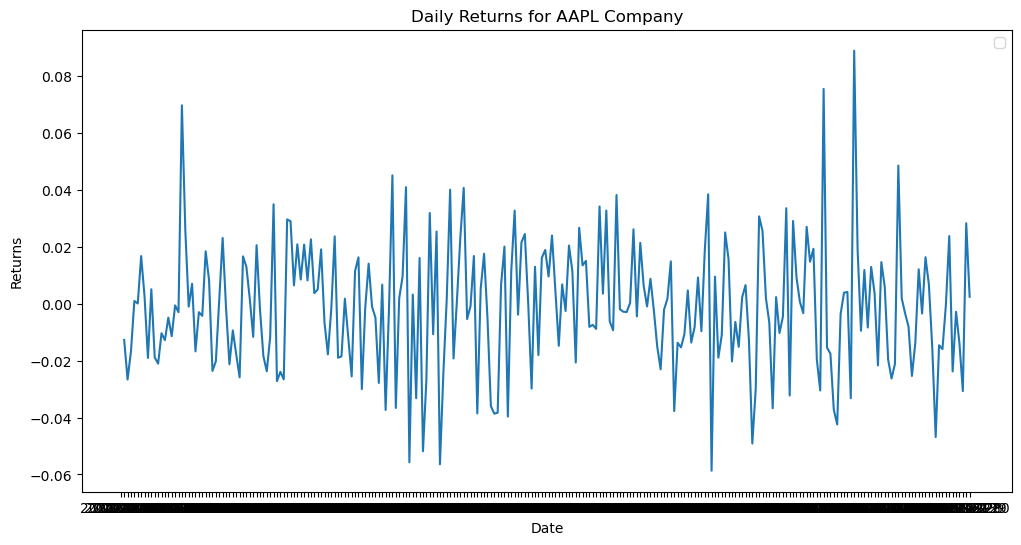

In [154]:
## Individual stock performance

ref_company_name = 'AAPL'
df_ref_company = df_stocks_data_overall.copy()
df_ref_company = df_ref_company[df_ref_company['company_name'] == ref_company_name]

plt.figure(figsize=(12, 6))

plt.plot(df_ref_company['Date'], df_ref_company['daily_returns'])

# for company, data in df_stocks_data_overall.groupby('company_name'):
#     plt.plot(data['Date'], data['daily_returns'], label=company)

plt.title(f'Daily Returns for {ref_company_name} Company')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

In [155]:
sqlquery = 'select * from  EdgarSECFilings ' ## We should use rowid to identify records
## SELECT rowid,cik,QuarterNo,form, FilingFilePath FROM EdgarSECFilings;

# sqlquery = 'select a.cik, b.ticker ,`a.2022Q`, a.form, a.FilingPath from  EdgarSECFilings as a left join EdgarFilingsStockFinancials on a.cik = b.cik as b where a.form="10-Q"'
result = FetchSqlResultsDatabase(sqlquery)
print(result)

        cik  QuarterNo     form  \
0    320193          1     10-Q   
1    320193          1        4   
2    320193          1        4   
3    320193          1        4   
4    320193          1        4   
..      ...        ...      ...   
203  789019          4      8-K   
204  789019          4  DEF 14A   
205  789019          4  DEFA14A   
206  789019          4  PX14A6G   
207  789019          4  PX14A6G   

                                        FilingFilePath  
0    /Users/kapildevarsh/Documents/Python Programmi...  
1    /Users/kapildevarsh/Documents/Python Programmi...  
2    /Users/kapildevarsh/Documents/Python Programmi...  
3    /Users/kapildevarsh/Documents/Python Programmi...  
4    /Users/kapildevarsh/Documents/Python Programmi...  
..                                                 ...  
203  /Users/kapildevarsh/Documents/Python Programmi...  
204  /Users/kapildevarsh/Documents/Python Programmi...  
205  /Users/kapildevarsh/Documents/Python Programmi...  
206  /Use

In [157]:
sqlquery = 'select a.cik, b.ticker , a.form, a.FilingFilePath from  EdgarSECFilings  a left join EdgarFilingsStockFinancials  b on a.cik = b.cik  where form="10-Q"'
# sqlquery = 'select a.cik, b.ticker ,`a.2022Q`, a.form, a.FilingPath from  EdgarSECFilings as a left join EdgarFilingsStockFinancials on a.cik = b.cik as b where a.form="10-Q"'
df_10Q_filings = FetchSqlResultsDatabase(sqlquery)
print(df_10Q_filings)

      cik ticker  form                                     FilingFilePath
0  320193   AAPL  10-Q  /Users/kapildevarsh/Documents/Python Programmi...
1  789019   MSFT  10-Q  /Users/kapildevarsh/Documents/Python Programmi...
2  320193   AAPL  10-Q  /Users/kapildevarsh/Documents/Python Programmi...
3  789019   MSFT  10-Q  /Users/kapildevarsh/Documents/Python Programmi...
4  320193   AAPL  10-Q  /Users/kapildevarsh/Documents/Python Programmi...
5  789019   MSFT  10-Q  /Users/kapildevarsh/Documents/Python Programmi...


In [158]:
## Filing Date can easily be retrieved from the FilePathName 
df_10Q_filings['filing_date'] = df_10Q_filings['FilingFilePath'].str.split('10-Q').str[1].str.split('_').str[1]

In [159]:
df_10Q_filings.head()

,cik,ticker,form,FilingFilePath,filing_date
0,320193,AAPL,10-Q,/Users/kapildevarsh/Documents/Python Programmi...,2022-01-28
1,789019,MSFT,10-Q,/Users/kapildevarsh/Documents/Python Programmi...,2022-01-25
2,320193,AAPL,10-Q,/Users/kapildevarsh/Documents/Python Programmi...,2022-04-29
3,789019,MSFT,10-Q,/Users/kapildevarsh/Documents/Python Programmi...,2022-04-26
4,320193,AAPL,10-Q,/Users/kapildevarsh/Documents/Python Programmi...,2022-07-29


In [161]:
df_10Q_filings_with_earnings = pd.merge(df_10Q_filings, df_stocks_data_overall[['company_name', 'Date','Volume','daily_returns']], how='left', left_on=['ticker','filing_date'], right_on=['company_name','Date'])

In [162]:
df_10Q_filings_with_earnings

,cik,ticker,form,FilingFilePath,filing_date,company_name,Date,Volume,daily_returns
0,320193,AAPL,10-Q,/Users/kapildevarsh/Documents/Python Programmi...,2022-01-28,AAPL,2022-01-28,179935700,0.069778
1,789019,MSFT,10-Q,/Users/kapildevarsh/Documents/Python Programmi...,2022-01-25,MSFT,2022-01-25,72848600,-0.026588
2,320193,AAPL,10-Q,/Users/kapildevarsh/Documents/Python Programmi...,2022-04-29,AAPL,2022-04-29,131747600,-0.036605
3,789019,MSFT,10-Q,/Users/kapildevarsh/Documents/Python Programmi...,2022-04-26,MSFT,2022-04-26,46518400,-0.037404
4,320193,AAPL,10-Q,/Users/kapildevarsh/Documents/Python Programmi...,2022-07-29,AAPL,2022-07-29,101786900,0.032793
5,789019,MSFT,10-Q,/Users/kapildevarsh/Documents/Python Programmi...,2022-10-25,MSFT,2022-10-25,34775500,0.013792


In [163]:
df_10Q_filings_with_earnings = df_10Q_filings_with_earnings[['cik', 'company_name', 'form', 'filing_date', 'Volume', 'daily_returns']]

In [164]:
df_10Q_filings_with_earnings = pd.merge(df_10Q_filings_with_earnings, df_stocks_vol_mean, how='left', on='company_name')
df_10Q_filings_with_earnings = pd.merge(df_10Q_filings_with_earnings, df_stocks_daily_returns_mean, how='left', on='company_name')

In [165]:
df_10Q_filings_with_earnings['volume_diff'] = df_10Q_filings_with_earnings['volume_mean'] - df_10Q_filings_with_earnings['Volume']
df_10Q_filings_with_earnings['daily_returns_diff'] = df_10Q_filings_with_earnings['daily_returns_mean'] - df_10Q_filings_with_earnings['daily_returns']

In [166]:
## Following dataframe shows summary stats of daily returns and volume and their difference from mean on the day of 10-Q filings
## This is the data frame that should be used for merging with the Sentiments/TextAnalysis file

df_10Q_filings_with_earnings

,cik,company_name,form,filing_date,Volume,daily_returns,volume_mean,daily_returns_mean,volume_diff,daily_returns_diff
0,320193,AAPL,10-Q,2022-01-28,179935700,0.069778,8.791038e+07,-0.001097,-9.202532e+07,-0.070874
1,789019,MSFT,10-Q,2022-01-25,72848600,-0.026588,3.121932e+07,-0.001085,-4.162928e+07,0.025503
2,320193,AAPL,10-Q,2022-04-29,131747600,-0.036605,8.791038e+07,-0.001097,-4.383722e+07,0.035508
3,789019,MSFT,10-Q,2022-04-26,46518400,-0.037404,3.121932e+07,-0.001085,-1.529908e+07,0.036318
4,320193,AAPL,10-Q,2022-07-29,101786900,0.032793,8.791038e+07,-0.001097,-1.387652e+07,-0.033890
5,789019,MSFT,10-Q,2022-10-25,34775500,0.013792,3.121932e+07,-0.001085,-3.556178e+06,-0.014877


In [167]:
### Once sentiment analysis is ready then this dataframe should be joined with sentiment of the filing to give holistic picture

In [168]:
##Task 7
import statsmodels.api as sm
import numpy as np

In [169]:
sql_database_path

'/Users/kapildevarsh/Documents/Python Programming for Fintech/Python Group Project/Data7/SQL/'

In [170]:
daily_stock_data_folder

'/Users/kapildevarsh/Documents/Python Programming for Fintech/Python Group Project/Data7/StocksY2022DailyData/'

In [171]:
df_stocks_data_overall = pd.DataFrame()
for file_name in os.listdir(daily_stock_data_folder):
    df_each_stock_data = pd.read_csv(f'{daily_stock_data_folder}{file_name}')
    df_each_stock_data['company_name'] = file_name.split('_')[0]
    df_stocks_data_overall = pd.concat([df_stocks_data_overall, df_each_stock_data])

In [172]:
df_stocks_data_overall['daily_returns'] = df_stocks_data_overall.groupby('company_name')['Close'].pct_change()

In [173]:
df_stocks_data_overall.head()

,Date,Open,High,Low,Close,Adj Close,Volume,company_name,daily_returns
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,179.953873,104487900,AAPL,NaN
1,2022-01-04,182.630005,182.940002,179.119995,179.699997,177.669968,99310400,AAPL,-0.012692
2,2022-01-05,179.610001,180.169998,174.639999,174.919998,172.944000,94537600,AAPL,-0.026600
3,2022-01-06,172.699997,175.300003,171.639999,172.000000,170.056976,96904000,AAPL,-0.016693
4,2022-01-07,172.889999,174.139999,171.029999,172.169998,170.225052,86709100,AAPL,0.000988


In [174]:
## Stats related to overall volume across all stocks
df_stocks_data_overall['Volume'].describe()

count    5.020000e+02
mean     5.956485e+07
std      3.391384e+07
min      9.200800e+06
25%      2.912962e+07
50%      5.464290e+07
75%      8.449002e+07
max      1.826020e+08
Name: Volume, dtype: float64

In [175]:
## Stock Volume statistics for each company
df_stocks_data_overall.groupby('company_name')['Volume'].describe()

,count,mean,std,min,25%,50%,75%,max
company_name,,,,,,,,
AAPL,251.0,8.791038e+07,2.365699e+07,35195900.0,72297400.0,83737200.0,96937050.0,182602000.0
MSFT,251.0,3.121932e+07,1.148387e+07,9200800.0,23334300.0,29043900.0,35292600.0,90428900.0


In [176]:
df_stocks_vol_mean = df_stocks_data_overall.groupby('company_name')['Volume'].mean().to_frame().reset_index()
df_stocks_vol_mean.columns = ['company_name', 'volume_mean']

In [177]:
## volume mean of each company
df_stocks_vol_mean

,company_name,volume_mean
0,AAPL,8.791038e+07
1,MSFT,3.121932e+07


In [178]:
## Daily returns 
df_stocks_data_overall.groupby('company_name')['daily_returns'].describe()

,count,mean,std,min,25%,50%,75%,max
company_name,,,,,,,,
AAPL,250.0,-0.001097,0.022471,-0.058680,-0.015816,-0.001360,0.013388,0.088975
MSFT,250.0,-0.001085,0.022308,-0.077156,-0.014975,-0.001939,0.012852,0.082268


In [179]:
df_stocks_daily_returns_mean = df_stocks_data_overall.groupby('company_name')['daily_returns'].mean().to_frame().reset_index()

In [180]:
df_stocks_daily_returns_mean.columns = ['company_name','daily_returns_mean']

In [181]:
df_stocks_daily_returns_mean

,company_name,daily_returns_mean
0,AAPL,-0.001097
1,MSFT,-0.001085


In [321]:
import matplotlib.pyplot as plt

In [322]:
sqlquery = "SELECT * FROM EdgarSECFilings"
# sqlquery = 'select a.cik, b.ticker ,`a.2022Q`, a.form, a.FilingPath from  EdgarSECFilings as a left join EdgarFilingsStockFinancials on a.cik = b.cik as b where a.form="10-Q"'
df = FetchSqlResultsDatabase(sqlquery)
print(df)

        cik  QuarterNo     form  \
0    320193          1     10-Q   
1    320193          1        4   
2    320193          1        4   
3    320193          1        4   
4    320193          1        4   
..      ...        ...      ...   
203  789019          4      8-K   
204  789019          4  DEF 14A   
205  789019          4  DEFA14A   
206  789019          4  PX14A6G   
207  789019          4  PX14A6G   

                                        FilingFilePath  FilingDate  
0    /Users/kapildevarsh/Documents/Python Programmi...  2022-01-28  
1    /Users/kapildevarsh/Documents/Python Programmi...  2022-02-03  
2    /Users/kapildevarsh/Documents/Python Programmi...  2022-02-03  
3    /Users/kapildevarsh/Documents/Python Programmi...  2022-02-03  
4    /Users/kapildevarsh/Documents/Python Programmi...  2022-02-03  
..                                                 ...         ...  
203  /Users/kapildevarsh/Documents/Python Programmi...  2022-12-16  
204  /Users/kapildevarsh/Do

In [323]:
sqlquery = 'select a.cik, b.ticker , a.form, a.FilingFilePath from  EdgarSECFilings  a left join EdgarFilingsStockFinancials  b on a.cik = b.cik  where form="10-Q"'
# sqlquery = 'select a.cik, b.ticker ,`a.2022Q`, a.form, a.FilingPath from  EdgarSECFilings as a left join EdgarFilingsStockFinancials on a.cik = b.cik as b where a.form="10-Q"'
df_10Q_filings = FetchSqlResultsDatabase(sqlquery)
print(df_10Q_filings)

      cik ticker  form                                     FilingFilePath
0  320193   AAPL  10-Q  /Users/kapildevarsh/Documents/Python Programmi...
1  789019   MSFT  10-Q  /Users/kapildevarsh/Documents/Python Programmi...
2  320193   AAPL  10-Q  /Users/kapildevarsh/Documents/Python Programmi...
3  789019   MSFT  10-Q  /Users/kapildevarsh/Documents/Python Programmi...
4  320193   AAPL  10-Q  /Users/kapildevarsh/Documents/Python Programmi...
5  789019   MSFT  10-Q  /Users/kapildevarsh/Documents/Python Programmi...


In [324]:
sqlquery2 = "SELECT * FROM EdgarFilingsStockFinancials"
df_fin = FetchSqlResultsDatabase(sqlquery2)
print(df_fin)

         cik ticker                           title
0     320193   AAPL                      Apple Inc.
1     789019   MSFT                  MICROSOFT CORP
2    1652044  GOOGL                   Alphabet Inc.
3    1018724   AMZN                  AMAZON COM INC
4    1045810   NVDA                     NVIDIA CORP
..       ...    ...                             ...
235   702165    NSC           NORFOLK SOUTHERN CORP
236  1858681    APO  Apollo Global Management, Inc.
237  1947559  ANZGY  ANZ GROUP HOLDINGS LIMITED/ADR
238  1835632   MRVL        Marvell Technology, Inc.
239   797468    OXY  OCCIDENTAL PETROLEUM CORP /DE/

[240 rows x 3 columns]


In [325]:
# List target forms as strings separated by commas (case sensitive) or
#   load from EDGAR_Forms.  (See EDGAR_Forms module for predefined lists.)
PARM_FORMS = ['10-Q']  # or, for example, PARM_FORMS = ['8-K', '8-K/A']
PARM_BGNYEAR = 2022  # User selected bgn period.   
PARM_ENDYEAR = 2023  # User selected end period.
PARM_BGNQTR = 1 # Beginning quarter of each year
PARM_ENDQTR = 1 # Ending quarter of each year
PARM_CIKS = [789019, 320193]

In [327]:
textual_analysis_path 

'/Users/kapildevarsh/Documents/Python Programming for Fintech/Python Group Project/Data8/TextualAnalysisData'

In [331]:
import shutil
src = base_local_path + '/Sample/SampleTextAnalysis.csv'
my_file = Path(textual_analysis_path + '/SampleTextAnalysis.csv')
if my_file.exists():
    Text=pd.read_csv(textual_analysis_path + '/SampleTextAnalysis.csv')
else:
    shutil.copy(src, textual_analysis_path)

In [332]:
Text['filing_date'] = pd.to_datetime(Text['filing_date'], format='%Y%m%d')
Text.head()
#Need to update data - add FilingDate column in the csv file beforehand

,file size,number of words,negative,positive,uncertainty,litigious,% strong modal,% weak modal,% constraining,# of alphabetic,# of digits,# of numbers,avg # of syllables per word,average word length,vocabulary,filing_date,cik,ticker
0,5669738,325651,0.333179,1.329951,0.111469,0.847840,0.018118,0.035314,0.106863,3724026,506259,84992,1.644795,5.263632,2371,2022-01-28,320193,AAPL
1,21933190,1984986,0.159145,0.402925,1.170386,0.214158,0.008212,0.020605,0.030277,14678175,1299576,226375,1.502127,5.072221,3398,2022-01-25,789019,MSFT
2,6140830,350763,0.291080,1.236162,0.092370,0.741241,0.013114,0.022807,0.078686,4039341,572150,93663,1.640940,5.276027,2056,2022-04-29,320193,AAPL
3,22314349,2015021,0.162777,0.406596,1.191898,0.213100,0.008238,0.020397,0.029975,14928132,1326806,231273,1.503259,5.075495,3421,2022-04-26,789019,MSFT
4,6109979,347625,0.296296,1.245883,0.091766,0.745919,0.012657,0.022150,0.078245,4016660,569732,92958,1.641605,5.276516,2025,2022-07-29,320193,AAPL


In [334]:
#Text.drop(columns='file name', axis=1, inplace=True)
Text.head()

,file size,number of words,negative,positive,uncertainty,litigious,% strong modal,% weak modal,% constraining,# of alphabetic,# of digits,# of numbers,avg # of syllables per word,average word length,vocabulary,filing_date,cik,ticker
0,5669738,325651,0.333179,1.329951,0.111469,0.847840,0.018118,0.035314,0.106863,3724026,506259,84992,1.644795,5.263632,2371,2022-01-28,320193,AAPL
1,21933190,1984986,0.159145,0.402925,1.170386,0.214158,0.008212,0.020605,0.030277,14678175,1299576,226375,1.502127,5.072221,3398,2022-01-25,789019,MSFT
2,6140830,350763,0.291080,1.236162,0.092370,0.741241,0.013114,0.022807,0.078686,4039341,572150,93663,1.640940,5.276027,2056,2022-04-29,320193,AAPL
3,22314349,2015021,0.162777,0.406596,1.191898,0.213100,0.008238,0.020397,0.029975,14928132,1326806,231273,1.503259,5.075495,3421,2022-04-26,789019,MSFT
4,6109979,347625,0.296296,1.245883,0.091766,0.745919,0.012657,0.022150,0.078245,4016660,569732,92958,1.641605,5.276516,2025,2022-07-29,320193,AAPL


In [335]:
df_stocks_data_overall['Date'] = pd.to_datetime(df_stocks_data_overall['Date'], format='%Y-%m-%d')

In [336]:
## The column names for Date in both dataframes are different and need to be same for joining on Date col
Text_earnings = pd.merge(Text, df_stocks_data_overall[['company_name', 'Date','Volume','daily_returns']], how='left', left_on=['ticker','filing_date'], right_on=['company_name','Date'])

In [337]:
Text_earnings_price = pd.merge(Text, df_stocks_data_overall[['company_name', 'Date','Volume','daily_returns']], how='left', left_on=['ticker','filing_date'], right_on=['company_name','Date'])

In [364]:
Text_earnings
## This data frame has included some extra columns which are essentially same like
## volume_mean_x == volume_mean_y and
## daily_returns_mean_x == daily_returns_mean_y that need to be dropped

,company_name,cik,positive,litigious,uncertainty,Volume,daily_returns,volume_mean_x,daily_returns_mean_x,volume_diff,daily_returns_diff,volume_mean_y,daily_returns_mean_y
0,AAPL,320193,1.329951,0.847840,0.111469,179935700,0.069778,8.791038e+07,-0.001097,-9.202532e+07,-0.070874,8.791038e+07,-0.001097
1,MSFT,789019,0.402925,0.214158,1.170386,72848600,-0.026588,3.121932e+07,-0.001085,-4.162928e+07,0.025503,3.121932e+07,-0.001085
2,AAPL,320193,1.236162,0.741241,0.092370,131747600,-0.036605,8.791038e+07,-0.001097,-4.383722e+07,0.035508,8.791038e+07,-0.001097
3,MSFT,789019,0.406596,0.213100,1.191898,46518400,-0.037404,3.121932e+07,-0.001085,-1.529908e+07,0.036318,3.121932e+07,-0.001085
4,AAPL,320193,1.245883,0.745919,0.091766,101786900,0.032793,8.791038e+07,-0.001097,-1.387652e+07,-0.033890,8.791038e+07,-0.001097
5,MSFT,789019,0.486061,0.262336,1.243126,34775500,0.013792,3.121932e+07,-0.001085,-3.556178e+06,-0.014877,3.121932e+07,-0.001085


In [365]:
##This data frame should include (but has not included )the daily_returns_diff and volime_diff ( their difference from mean ) as important dependent variables for regression
Text_earnings = Text_earnings[['company_name','cik','positive','litigious','uncertainty', 'Volume', 'daily_returns']]

In [366]:
Text_earnings = pd.merge(Text_earnings, df_stocks_vol_mean, how='left', on='company_name')
Text_earnings = pd.merge(Text_earnings, df_stocks_daily_returns_mean, how='left', on='company_name')


In [367]:
Text_earnings['volume_diff'] = Text_earnings['volume_mean'] - Text_earnings['Volume']
Text_earnings['daily_returns_diff'] = Text_earnings['daily_returns_mean'] - Text_earnings['daily_returns']

In [368]:
## Following dataframe shows sentiments / textual analytics data along with summary stats of daily returns and volume and their difference from mean on the day of 10-Q filings
Text_earnings
## This data frame should inlcude the Date column ( but has not been captured due to column name mismatch)

,company_name,cik,positive,litigious,uncertainty,Volume,daily_returns,volume_mean,daily_returns_mean,volume_diff,daily_returns_diff
0,AAPL,320193,1.329951,0.847840,0.111469,179935700,0.069778,8.791038e+07,-0.001097,-9.202532e+07,-0.070874
1,MSFT,789019,0.402925,0.214158,1.170386,72848600,-0.026588,3.121932e+07,-0.001085,-4.162928e+07,0.025503
2,AAPL,320193,1.236162,0.741241,0.092370,131747600,-0.036605,8.791038e+07,-0.001097,-4.383722e+07,0.035508
3,MSFT,789019,0.406596,0.213100,1.191898,46518400,-0.037404,3.121932e+07,-0.001085,-1.529908e+07,0.036318
4,AAPL,320193,1.245883,0.745919,0.091766,101786900,0.032793,8.791038e+07,-0.001097,-1.387652e+07,-0.033890
5,MSFT,789019,0.486061,0.262336,1.243126,34775500,0.013792,3.121932e+07,-0.001085,-3.556178e+06,-0.014877


In [369]:
### Once sentiment analysis is ready then this dataframe should be joined with sentiment of the filing to give holistic picture

In [370]:
## Regression Analysis - Note we are regressing the daily returns (i.e % change in price daily) as against the Rolling/Total Return
## on the 3 parameters for tone - Positve, Litigous and uncertainity.
## Overall Tone classification is omitted
y1 = Text_earnings['daily_returns'] 
y2 = Text_earnings['volume_mean']
X1 = Text_earnings[['positive', 'litigious', 'uncertainty']]
X2 = Text_earnings[['positive', 'litigious']]
X3 = Text_earnings[['positive']]
X4 = Text_earnings[['litigious', 'uncertainty']]
X1 = sm.add_constant(X1)
X2 = sm.add_constant(X2)
X3 = sm.add_constant(X3)
X4 = sm.add_constant(X4)

In [371]:
model_1 = sm.OLS(y1, X1)
model_2 = sm.OLS(y1, X2)
model_3 = sm.OLS(y1, X3)
model_4 = sm.OLS(y1, X4)
model_5 = sm.OLS(y2, X1)
model_6 = sm.OLS(y2, X2)
model_7 = sm.OLS(y2, X3)
model_8 = sm.OLS(y2, X4)

In [372]:
results1 = model_1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:          daily_returns   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     2.037
Date:                Tue, 09 Jan 2024   Prob (F-statistic):              0.346
Time:                        03:23:01   Log-Likelihood:                 15.019
No. Observations:                   6   AIC:                            -22.04
Df Residuals:                       2   BIC:                            -22.87
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.4972      0.436     -1.139      

/Users/kapildevarsh/anaconda3/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [373]:
results2 = model_2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:          daily_returns   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     1.988
Date:                Tue, 09 Jan 2024   Prob (F-statistic):              0.282
Time:                        03:23:02   Log-Likelihood:                 13.350
No. Observations:                   6   AIC:                            -20.70
Df Residuals:                       3   BIC:                            -21.32
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0303      0.063      0.479      0.6

/Users/kapildevarsh/anaconda3/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [374]:
results3 = model_3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:          daily_returns   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     1.765
Date:                Tue, 09 Jan 2024   Prob (F-statistic):              0.255
Time:                        03:23:03   Log-Likelihood:                 11.915
No. Observations:                   6   AIC:                            -19.83
Df Residuals:                       4   BIC:                            -20.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0419      0.037     -1.120      0.3

/Users/kapildevarsh/anaconda3/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [375]:
results4 = model_4.fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:          daily_returns   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     4.582
Date:                Tue, 09 Jan 2024   Prob (F-statistic):              0.122
Time:                        03:23:04   Log-Likelihood:                 15.019
No. Observations:                   6   AIC:                            -24.04
Df Residuals:                       3   BIC:                            -24.66
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.4958      0.204     -2.427      

/Users/kapildevarsh/anaconda3/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [376]:
results5 = model_5.fit()
print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:            volume_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.789e+04
Date:                Tue, 09 Jan 2024   Prob (F-statistic):           5.59e-05
Time:                        03:23:04   Log-Likelihood:                -80.882
No. Observations:                   6   AIC:                             169.8
Df Residuals:                       2   BIC:                             168.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.884e+07   3.81e+06     15.428      

/Users/kapildevarsh/anaconda3/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [377]:
results6 = model_6.fit()
print(results6.summary())

                            OLS Regression Results                            
Dep. Variable:            volume_mean   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     289.8
Date:                Tue, 09 Jan 2024   Prob (F-statistic):           0.000370
Time:                        03:23:06   Log-Likelihood:                -95.667
No. Observations:                   6   AIC:                             197.3
Df Residuals:                       3   BIC:                             196.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.756e+06   4.92e+06     -0.764      0.5

/Users/kapildevarsh/anaconda3/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [352]:
results7 = model_7.fit()
print(results7.summary())

                            OLS Regression Results                            
Dep. Variable:            volume_mean   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     433.7
Date:                Tue, 09 Jan 2024   Prob (F-statistic):           3.14e-05
Time:                        03:17:15   Log-Likelihood:                -97.387
No. Observations:                   6   AIC:                             198.8
Df Residuals:                       4   BIC:                             198.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.558e+06   3.05e+06      0.837      0.4

/Users/kapildevarsh/anaconda3/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [353]:
results8 = model_8.fit()
print(results8.summary())

                            OLS Regression Results                            
Dep. Variable:            volume_mean   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2255.
Date:                Tue, 09 Jan 2024   Prob (F-statistic):           1.71e-05
Time:                        03:17:16   Log-Likelihood:                -89.526
No. Observations:                   6   AIC:                             185.1
Df Residuals:                       3   BIC:                             184.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.697e+07   7.54e+06     10.209      

/Users/kapildevarsh/anaconda3/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


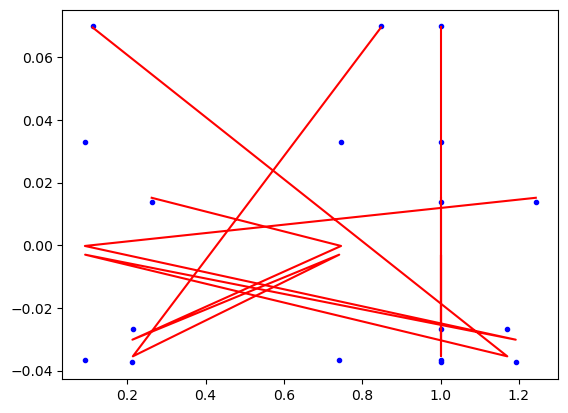

In [354]:
## This graph shows that no feasable / interpretable relation could be determined from the 
#regression for Model 4
yhat = results4.predict(X4)

plt.figure()
plt.plot(X4, y1, 'b.')
plt.plot(X4, yhat, 'r')
plt.show()


In [355]:
## Test the correlation between X1,X2,X3

In [216]:
grouped = Text_earnings.groupby('company_name')

In [217]:
d1 = grouped.get_group('AAPL')
d2 = grouped.get_group('MSFT')

In [218]:
M1 = np.array([d1['positive'], d1['litigious'], d1['uncertainty']])
M2 = np.array([d2['positive'], d2['litigious'], d2['uncertainty']])

In [219]:
corr_matrix1 = np.corrcoef(M1)
corr_matrix2= np.corrcoef(M2)

In [220]:
print(corr_matrix1)

[[1.         0.99845766 0.99264515]
 [0.99845766 1.         0.99783524]
 [0.99264515 0.99783524 1.        ]]


In [221]:
print(corr_matrix2)

[[1.         0.99832417 0.96819445]
 [0.99832417 1.         0.95209308]
 [0.96819445 0.95209308 1.        ]]
